In [3]:
import pandas as pd
import numpy as np

In [100]:
aa = pd.read_csv('BANKNIFTYfull.csv')

returns = []
for i in range(len(aa)-1):
    returns.append((abs(aa.Close[i+1]-aa.Close[i])+0.000001)/aa.Close[i])
    
(np.log(np.array(returns))).std()

1.2141817947276703

In [102]:
aa

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17 00:00:00+05:30,6898.000000,6977.200195,6843.000000,6897.100098,6897.100098,0
1,2007-09-18 00:00:00+05:30,6921.149902,7078.950195,6883.600098,7059.649902,7059.649902,0
2,2007-09-19 00:00:00+05:30,7111.000000,7419.350098,7111.000000,7401.850098,7401.850098,0
3,2007-09-20 00:00:00+05:30,7404.950195,7462.899902,7343.600098,7390.149902,7390.149902,0
4,2007-09-21 00:00:00+05:30,7378.299805,7506.350098,7367.149902,7464.500000,7464.500000,0
...,...,...,...,...,...,...,...
2243,2017-12-26 00:00:00+05:30,25659.750000,25712.949219,25545.599609,25675.250000,25675.250000,0
2244,2017-12-27 00:00:00+05:30,25652.849609,25733.199219,25429.550781,25496.050781,25496.050781,0
2245,2017-12-28 00:00:00+05:30,25463.599609,25561.949219,25417.400391,25490.000000,25490.000000,0
2246,2017-12-29 00:00:00+05:30,25484.849609,25566.400391,25450.250000,25539.449219,25539.449219,0


In [103]:
rates = [0]*30

for i in range(len(aa)-1):
    if(aa.Open[i+1]-aa.Close[i]>0):
        j=i
        try:
            while(aa.Close[j]-aa.Close[i]>=0.0):
                try: 
                    rates[j-i]-=1
                    rates[j-i+1]+=1
                    j+=1
                except:
                    break
        except:
            pass

for i in range(1,len(rates)-1):
    rates[i+1]+=rates[i]

In [104]:
import matplotlib.pyplot as plt

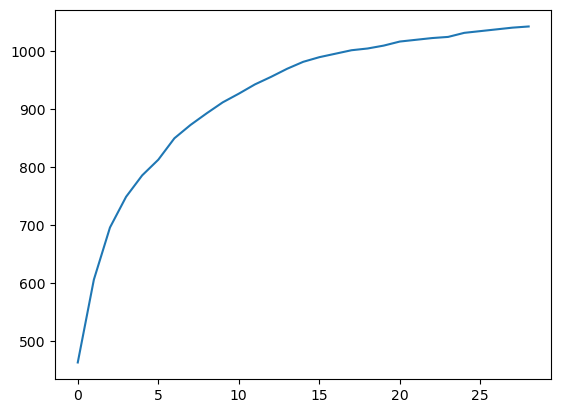

In [105]:
yello = rates[1:]
plt.plot(yello)
plt.show()

In [135]:
rates = [[0]*30,[0]*30,[0]*30,[0]*30,[0]*30]
k=[0,0,0,0,0]
for i in range(len(aa)-1):
    if(aa.Open[i+1]-aa.Close[i]>0):
        d=0
        
        if((aa.Open[i+1]-aa.Close[i])/aa.Close[0]>0.02):
            d=4
        elif((aa.Open[i+1]-aa.Close[i])/aa.Close[0]>0.015):
            d=3
        elif((aa.Open[i+1]-aa.Close[i])/aa.Close[0]>0.01):
            d=2
        elif((aa.Open[i+1]-aa.Close[i])/aa.Close[0]>0.005):
            d=1
        j=i
        k[d]+=1
        try:
            while(aa.Close[j]-aa.Close[i]>=0.0):
                try: 
                    rates[d][j-i]-=1
                    rates[d][j-i+1]+=1
                    j+=1
                except:
                    break
        except:
            pass
print(rates)

for d in range(5):
    for i in range(1,len(rates[0])-1):
        rates[d][i+1]+=rates[d][i]
    rates[d][0]=0

[[-481, 230, 55, 29, 15, 14, 5, 12, 9, 10, 7, 6, 1, 2, 4, 4, 4, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], [-400, 136, 54, 33, 20, 8, 7, 11, 9, 5, 6, 5, 4, 5, 4, 5, 1, 1, 2, 1, 1, 3, 0, 2, 0, 0, 2, 2, 0, 1], [-189, 53, 22, 14, 7, 4, 8, 6, 3, 1, 2, 0, 3, 1, 2, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0], [-96, 27, 8, 10, 6, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0], [-116, 17, 4, 4, 5, 9, 5, 6, 2, 2, 3, 4, 6, 3, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1]]


In [136]:
# rates()

In [137]:
for d in range(5):
    rates[d] = np.array(rates[d])/k[d]
rates = np.array(rates)
rates = rates.transpose()
rates = pd.DataFrame(rates,columns = ['0-0.5%','0.5% - 1%','1% - 1.5%','1.5% - 2%','2% - inf%'])

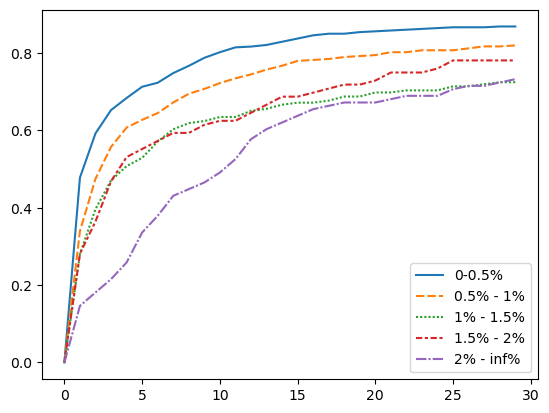

In [143]:
sns.lineplot(data = rates)
# x = "days",y = "fraction gaps filled"

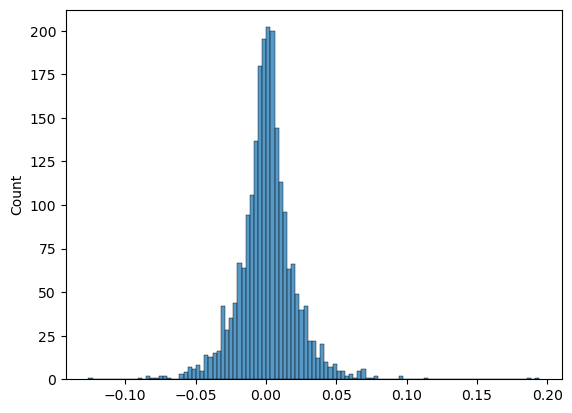

In [139]:
gaps = []

for i in range(len(aa)-1):
    gaps.append((aa.Close[i+1]-aa.Close[i]+0.000001)/aa.Close[i])
import seaborn as sns
sns.histplot(gaps)